## **가설 설정 (문제 정의)**

### 1. 목표
- 전 세계에서 발생한 테러 사건의 패턴, 영향도, 지역적 분포, 공격 유형 등을 분석하여
  
  - 가장 많이 발생한 테러 국가 및 도시 파악
  - 공격 유형별 피해 규모 분석
  - 특정 지역의 테러 유형 패턴 이해
  - 사망자 수 예측을 위한 특성 분석

- 등과 같은 인사이트 도출을 목표한다.

<br>

### 2. 가설
**(1) 중동 지역(예: Iraq, Pakistan 등)에서 테러 사건이 가장 많이 발생했을 것이다.** <br>
**(2) 테러 피해자 수 (사망자+부상자)는 사용된 무기 유형과 밀접한 관련이 있다.**


## **1990~2021년 데이터 로드**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_1990 = pd.read_excel("/content/drive/MyDrive/LikeLion/Final-Project/terror_finalver(plz).xlsx")

In [4]:
df_1990.shape

(173597, 19)

In [5]:
df_1990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173597 entries, 0 to 173596
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       173597 non-null  int64  
 1   eventid          173597 non-null  int64  
 2   iyear            173597 non-null  int64  
 3   imonth           173597 non-null  int64  
 4   iday             173597 non-null  int64  
 5   country_txt      173597 non-null  object 
 6   region_txt       173597 non-null  object 
 7   provstate        173597 non-null  object 
 8   latitude         173597 non-null  object 
 9   longitude        173597 non-null  object 
 10  city             173597 non-null  object 
 11  success          173597 non-null  int64  
 12  attacktype1_txt  173597 non-null  object 
 13  targtype1_txt    173597 non-null  object 
 14  weaptype1_txt    173597 non-null  object 
 15  nkill            173597 non-null  float64
 16  nwound           173597 non-null  int6

In [6]:
# 중복 제거 전 행 수 확인
print(f"중복 제거 전: {df_1990.shape[0]} rows")

# 'eventid'와 'Unnamed: 0' 제외한 컬럼 기준으로 중복 제거
df_1990 = df_1990.drop_duplicates(subset=[col for col in df_1990.columns if col not in ['eventid', 'Unnamed: 0']])

# 중복 제거 후 행 수 확인
print(f"중복 제거 후: {df_1990.shape[0]} rows")

# 'Unnamed: 0' 컬럼 삭제
df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

중복 제거 전: 173597 rows
중복 제거 후: 167685 rows


<ipython-input-6-b0304ca1e3f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


## **파생 변수**
- total_victim 이라는 컬럼을 생성해서 피해 규모를 확인

In [7]:
df_1990['total_victim'] = df_1990['nkill'] + df_1990['nwound']
df_1990.head()

<ipython-input-7-0e3fb2868bdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990['total_victim'] = df_1990['nkill'] + df_1990['nwound']


,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,city,success,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,natlty1_txt,gname,total_victim
0,199001000001,1990,1,0,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Matnzas,1,Hostage Taking (Kidnapping),Journalists & Media,Firearms,0.0,0,Lebanon,Unknown,0.0
1,199001010001,1990,1,1,India,South Asia,Jammu and Kashmir,34.08374,74.789902,Tucata,1,Bombing/Explosion,Government (General),Explosives,0.0,0,India,Unknown,0.0
2,199001010002,1990,1,1,India,South Asia,Jammu and Kashmir,34.08374,74.789902,Janajanea,1,Bombing/Explosion,Business,Explosives,0.0,0,India,Unknown,0.0
3,199001010003,1990,1,1,India,South Asia,Jammu and Kashmir,34.08374,74.789902,Junin district,1,Bombing/Explosion,Transportation,Explosives,0.0,0,India,Unknown,0.0
4,199001010004,1990,1,1,Bolivia,South America,Cochabamba,-17.382789,-66.166439,Junin,1,Bombing/Explosion,Religious Figures/Institutions,Explosives,0.0,0,United States,Alejo Calatayu,0.0


In [8]:
summary_stats = df_1990[['nkill', 'nwound', 'total_victim']].describe().round(3)
summary_stats

,nkill,nwound,total_victim
count,167685.000,167685.000,167685.000
mean,2.536,3.292,5.828
std,11.121,34.155,39.619
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,1.000,0.000,2.000
75%,2.000,3.000,5.000
max,1700.000,10878.000,12263.000


## **공격 유형이 Unknown 경우**
- 관련 그래프를 도출
- attack_type에서 unknown 삭제를 고민했지만 차지하는 비율이 많아 삭제하지않고 Unknown으로 남겨둠


### **공격 유형별 빈도**

<ipython-input-9-e275bcece91d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts_raw.values, y=attack_counts_raw.index, palette='crest')


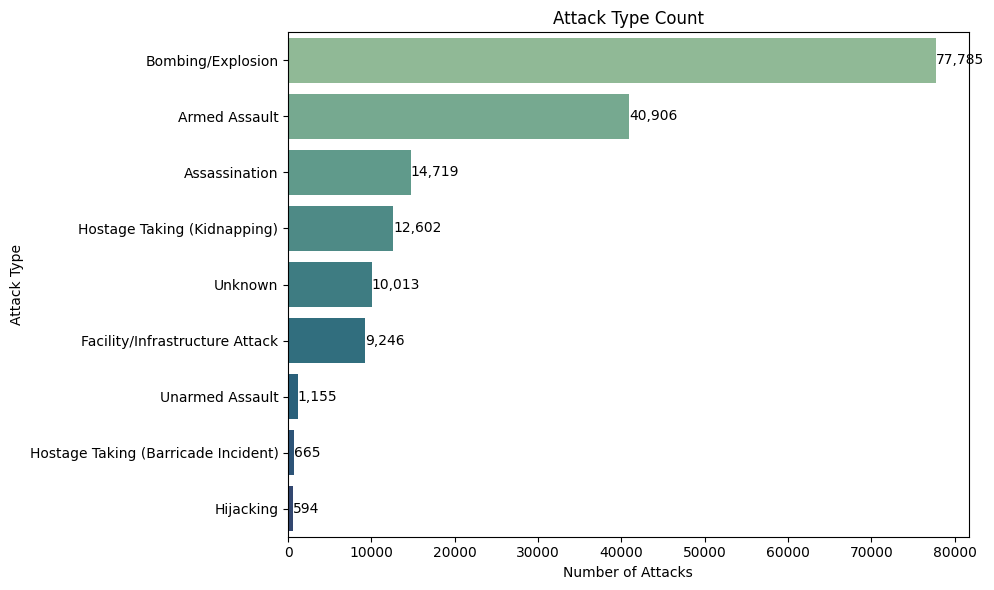

In [9]:
# 공격 유형별 빈도
attack_counts_raw = df_1990['attacktype1_txt'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts_raw.values, y=attack_counts_raw.index, palette='crest')
plt.title('Attack Type Count')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')

# 수치 표시
for index, value in enumerate(attack_counts_raw.values):
    plt.text(value + 10, index, f'{value:,}', va='center')

plt.tight_layout()
plt.show()



### **공격 유형별 비율**

<ipython-input-10-a481d1e4f79c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_ratio.values, y=attack_ratio.index, palette='crest')


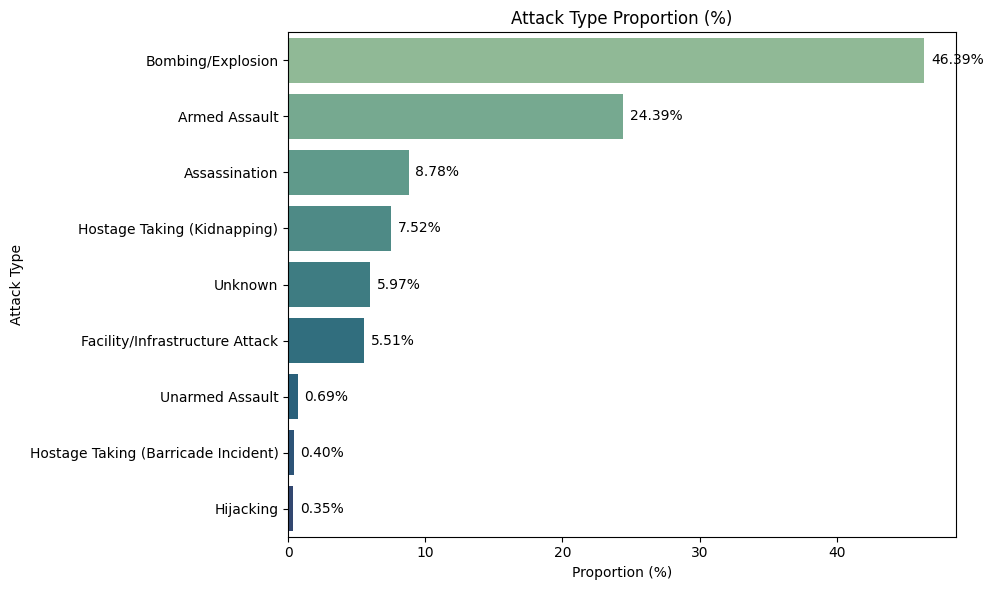

In [10]:
# 공격 유형별 비율
attack_ratio = (df_1990['attacktype1_txt'].value_counts(normalize=True) * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=attack_ratio.values, y=attack_ratio.index, palette='crest')
plt.title('Attack Type Proportion (%)')
plt.xlabel('Proportion (%)')
plt.ylabel('Attack Type')

# 비율 표시
for index, value in enumerate(attack_ratio.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()


### **도출!**
- 언노운이 전체 공격 유형 중 4% (약 5,200건)을 차지
- 큰 부분을 차지하지 않기도 하고, 유의미한 정보를 얻을 수 없다고 판단하여 삭제를 진행

 ### **연도별 Unknown 공격 유형 테러 건수**

In [11]:
# Unknown 공격 유형만 필터링
unknown_df = df_1990[df_1990['attacktype1_txt'] == 'Unknown']

<ipython-input-12-b27a4d80b59f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unknown_by_year.index, y=unknown_by_year.values, palette='Blues_d')


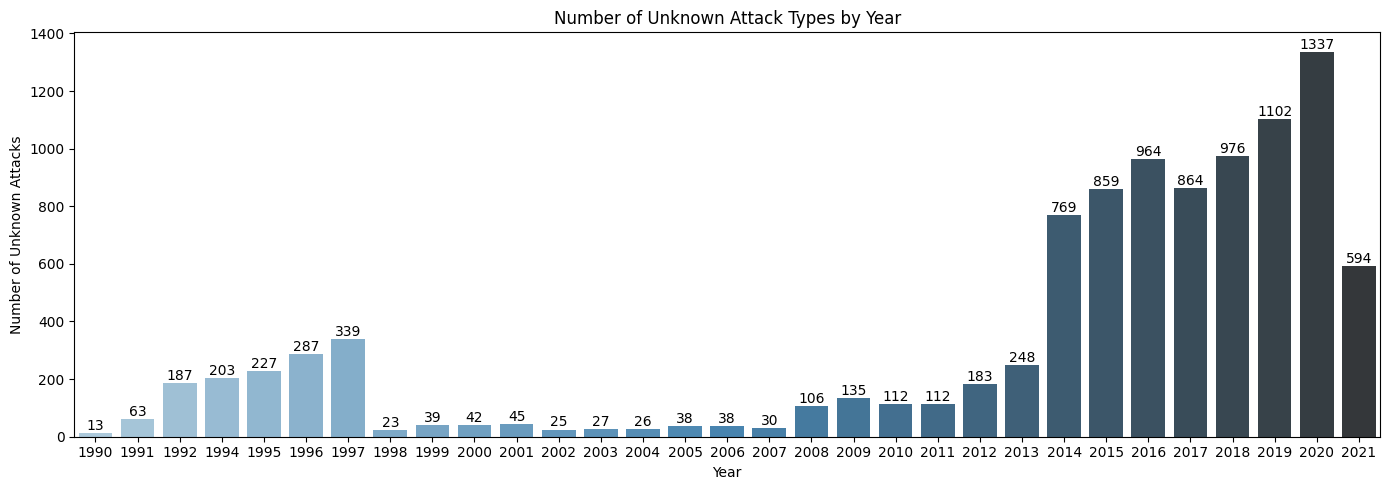

In [12]:
# Unknown 공격 유형의 연도별 건수 집계
unknown_by_year = unknown_df['iyear'].value_counts().sort_index()

# 그래프 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=unknown_by_year.index, y=unknown_by_year.values, palette='Blues_d')
plt.title('Number of Unknown Attack Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Unknown Attacks')

# 수치 표시
for i, value in enumerate(unknown_by_year.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### **연도별 Unknown 공격 유형의 사상자 수**

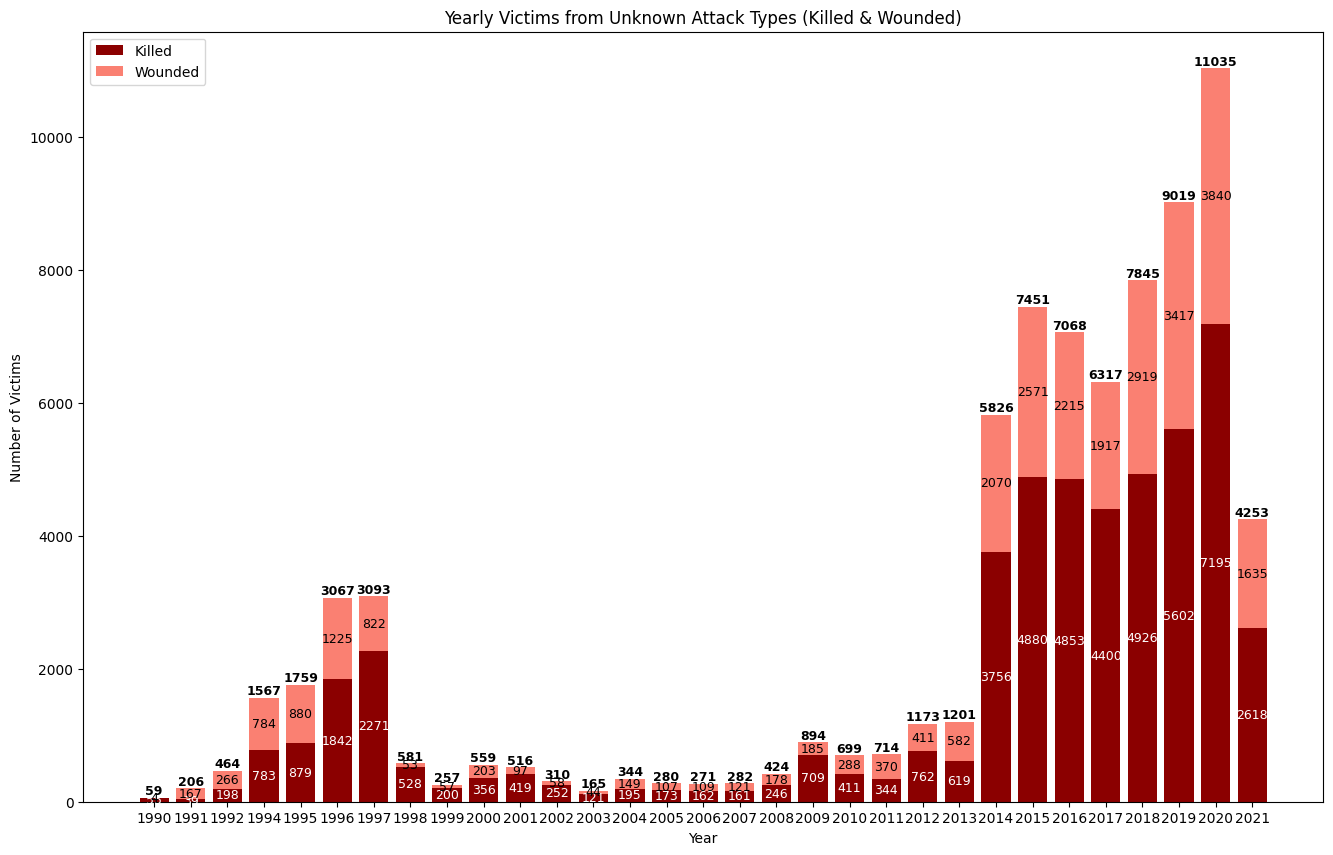

In [13]:
# 연도별 사망자(nkill)와 부상자(nwound) 합계
death_wound_by_year = unknown_df.groupby('iyear')[['nkill', 'nwound']].sum().sort_index()

# 인덱스를 문자열로 변환하여 x축 처리
years = death_wound_by_year.index.astype(str)

plt.figure(figsize=(16, 10))
plt.bar(years, death_wound_by_year['nkill'], label='Killed', color='darkred')
plt.bar(years, death_wound_by_year['nwound'],
        bottom=death_wound_by_year['nkill'], label='Wounded', color='salmon')

# 수치 표시 - 사망자(killed)
for i, killed in enumerate(death_wound_by_year['nkill']):
    if killed > 0:
        plt.text(i, killed / 2, int(killed), ha='center', va='center', fontsize=9, color='white')

# 수치 표시 - 부상자(wounded)
for i, (killed, wounded) in enumerate(zip(death_wound_by_year['nkill'], death_wound_by_year['nwound'])):
    if wounded > 0:
        plt.text(i, killed + wounded / 2, int(wounded), ha='center', va='center', fontsize=9, color='black')

# 수치 표시 - 총합
for i, (killed, wounded) in enumerate(zip(death_wound_by_year['nkill'], death_wound_by_year['nwound'])):
    total = killed + wounded
    plt.text(i, total + 1, int(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

# 그래프 설정
plt.title('Yearly Victims from Unknown Attack Types (Killed & Wounded)')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.legend()
plt.show()

### **도출!**
1. Unknown의 연도별 추이를 봤을 때,
- 1997년까지 증가하는 추세 → 1998 급감
- 2013~2014년부터 급등

2. Unknown 공격 유형 자체가
- 부상자 < 사망자가 더 많음

In [14]:
# 1997년과 1998년의 데이터만 추출
unknown_9798 = unknown_df[unknown_df['iyear'].isin([1997, 1998])]

# 나라별 사건 수 집계
country_counts = unknown_9798['country_txt'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts.head(10)

,Country,Count
0,Colombia,77
1,Algeria,62
2,Myanmar,30
3,Sri Lanka,19
4,Burundi,15
5,India,14
6,Rwanda,13
7,Turkey,11
8,Uganda,11
9,Pakistan,9


In [15]:
# 2014년과 2015년의 데이터만 추출
unknown_1415 = unknown_df[unknown_df['iyear'].isin([2014, 2015])]

# 나라별 사건 수 집계
country_counts = unknown_1415['country_txt'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts.head(10)

,Country,Count
0,Afghanistan,324
1,Iraq,284
2,Somalia,198
3,Yemen,189
4,Syria,71
5,Libya,67
6,Ukraine,63
7,Pakistan,46
8,Nigeria,44
9,India,42


### 도출! (배경)
1. 1997~1998
- 콜롬비아 : 콜롬비아 연합자위대가 (준군사조직이며 마약밀매조직) 결성 <br>
→ 콜롬비아 내전 발생, 민간인 학살과 같은 심각한 인권 침해
- 알제리 : 알제리 내전 중 1997년 총 13건의 학살이 발생

<br>

2. 2014~2015
- 아프가니스탄 : 탈레반과 아프간 보안군이 벌이는 전투가 많이 발생

### **테러 건수 상위 10개국 중 Unknown 공격 유형 분포**

<ipython-input-16-2e59fd38dba5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unknown_by_country10.values, y=unknown_by_country10.index, palette='rocket')


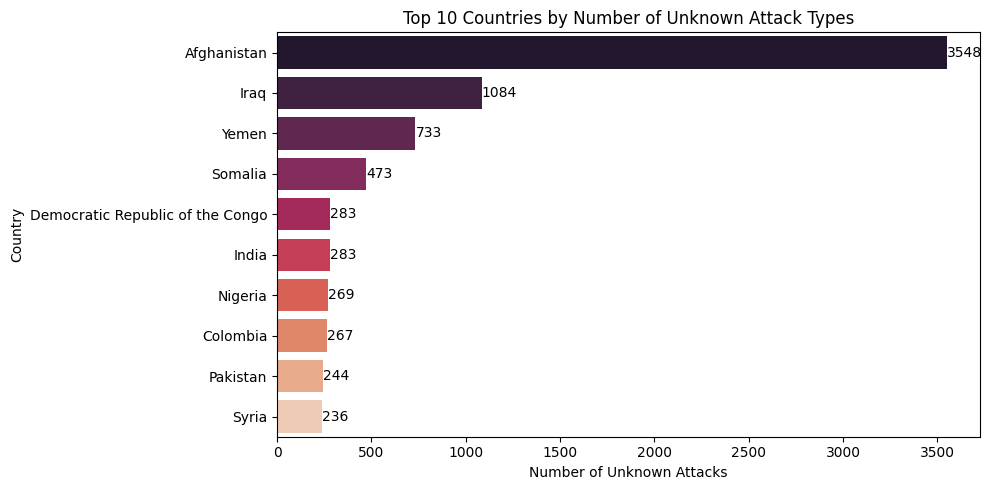

In [16]:
#  Unknown 공격 유형이 가장 많은 국가 Top 10
unknown_df = df_1990[df_1990['attacktype1_txt'] == 'Unknown']
unknown_by_country10 = unknown_df['country_txt'].value_counts().head(10)

# Unknown 사건 수 Top 10
plt.figure(figsize=(10, 5))
sns.barplot(x=unknown_by_country10.values, y=unknown_by_country10.index, palette='rocket')
plt.title('Top 10 Countries by Number of Unknown Attack Types')
plt.xlabel('Number of Unknown Attacks')
plt.ylabel('Country')
for i, val in enumerate(unknown_by_country10.values):
    plt.text(val + 0.2, i, val, va='center')
plt.tight_layout()
plt.show()


### **테러 건수 상위 10개국 전체 사건 중 Unknown이 차지하는 비율**

<ipython-input-17-462db7460adb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unknown_ratio_sorted.values, y=unknown_ratio_sorted.index, palette='mako')


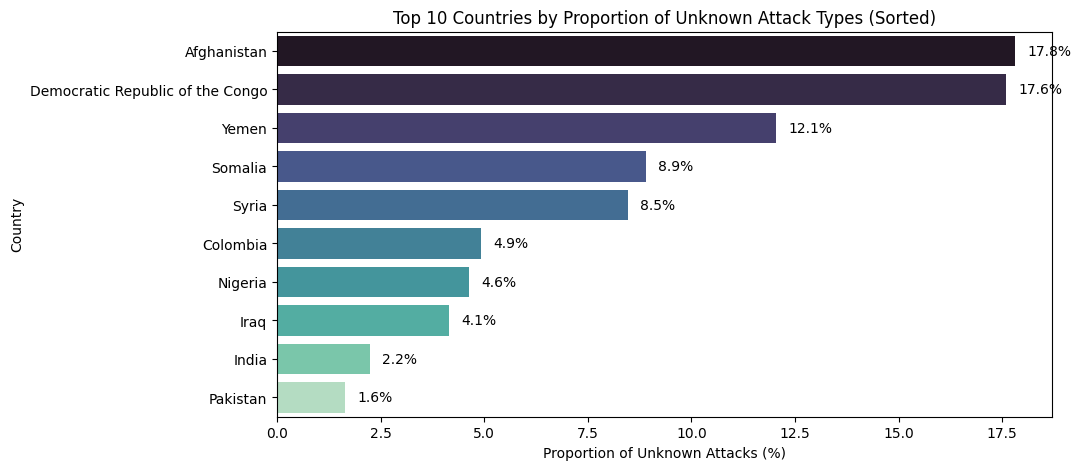

In [17]:
# 국가별 전체 사건 수 대비 Unknown 비중 계산
total_by_country = df_1990['country_txt'].value_counts()
unknown_ratio = (unknown_by_country10 / total_by_country[unknown_by_country10.index] * 100).round(2)

# 기존 unknown_ratio 시리즈를 내림차순 정렬
unknown_ratio_sorted = unknown_ratio.sort_values(ascending=False)

# Unknown 비중 (Top 10 기준 국가)
plt.figure(figsize=(10, 5))
sns.barplot(x=unknown_ratio_sorted.values, y=unknown_ratio_sorted.index, palette='mako')
plt.title('Top 10 Countries by Proportion of Unknown Attack Types (Sorted)')
plt.xlabel('Proportion of Unknown Attacks (%)')
plt.ylabel('Country')
for i, val in enumerate(unknown_ratio_sorted.values):
    plt.text(val + 0.3, i, f'{val:.1f}%', va='center')
plt.show()

## **가설 1**
- **중동 지역(Iraq, Pakistan 등)에서 테러 사건이 가장 많이 발생했을 것이다.**

### **지역별 테러 발생 건수**

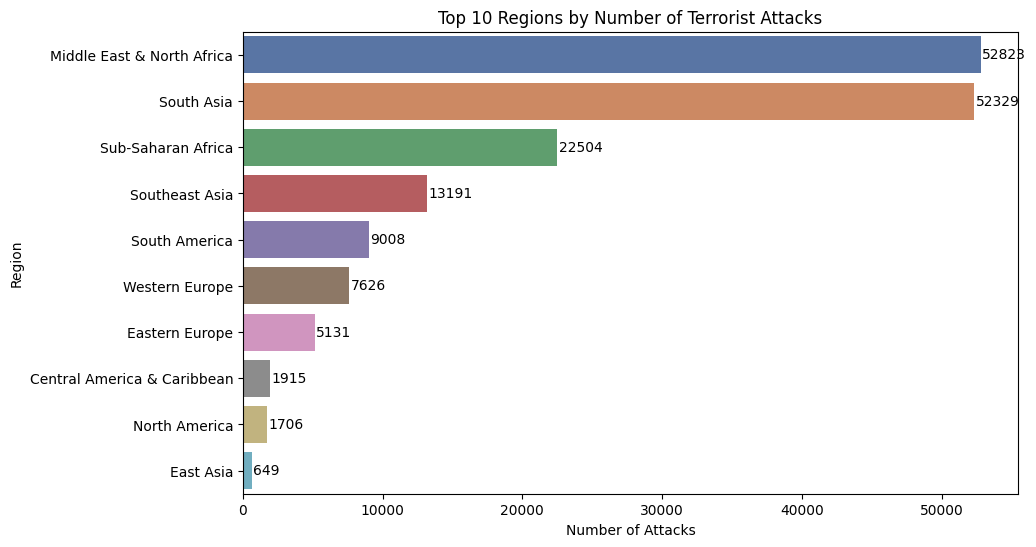

In [18]:
# Top 10 지역별 테러 발생 건수
top_regions = df_1990['region_txt'].value_counts().head(10)

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot( x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette='deep')

# 수치 표시
for i, value in enumerate(top_regions.values):
    ax.text(value + 100, i, str(value), va='center')

plt.title("Top 10 Regions by Number of Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Region")
plt.show()

### 추가!
- South Asia와 Southeast Asia를 합치지 않은 이유
  - 문화적 배경이 다르다고 판단

| 구분 기준   | South Asia (남아시아)              | Southeast Asia (동남아시아)                    |
|-------------|------------------------------------|------------------------------------------------|
| 대표 국가   | 인도, 파키스탄, 방글라데시 등      | 태국, 베트남, 인도네시아, 말레이시아 등       |
| 중심 문화   | 인도 문화 중심 (힌두, 불교 등)     | 인도 + 중국 + 이슬람 + 서양 문화 혼합         |
| 주요 종교   | 힌두교, 이슬람교, 불교              | 불교, 이슬람교, 기독교, 힌두교 등              |
| 언어        | 인도유럽어족, 영어 등               | 타이-카다이어, 오스트로네시아어족, 영어 등     |
| 지역 기구   | SAARC (남아시아 지역 협력 연합)     | ASEAN (동남아시아 국가 연합)                  |
| 지형 특징   | 인도 아대륙, 히말라야 인접          | 섬과 반도 많음, 열대 기후                      |
| 경제 특징   | 인도 중심의 성장                    | 제조업, 관광산업 발달, 다국적 투자 활발        |


### **국가별 테러 발생 건수**

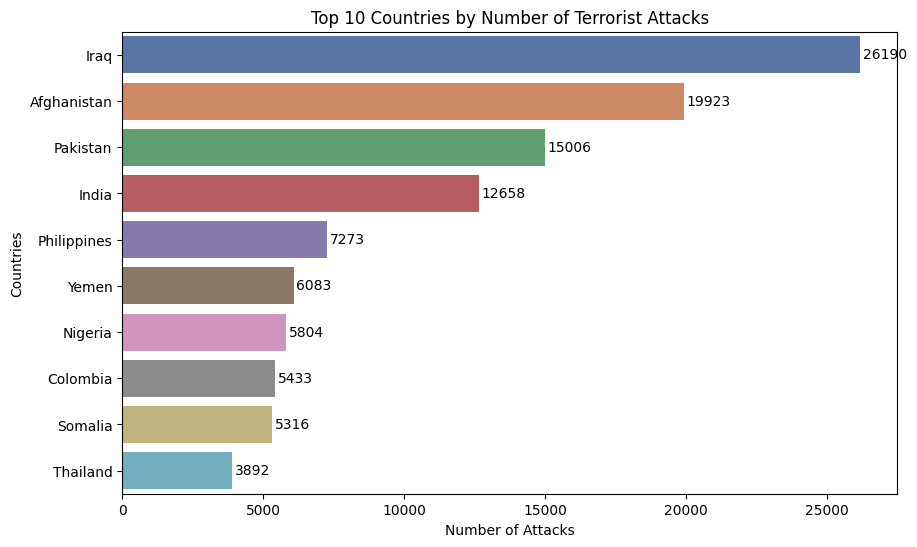

In [19]:
# Top 10 국가별 테러 발생 건수
top_countries = df_1990['country_txt'].value_counts().head(10)

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot( x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='deep')

# 수치 표시
for i, value in enumerate(top_countries.values):
    ax.text(value + 100, i, str(value), va='center')

plt.title("Top 10 Countries by Number of Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Countries")
plt.show()

### **도출!**
- 지역별
  - 가설에 맞게 중동 & 북아프리카 지역의 테러 발생이 제일 많았다.
- 나라별
  - 이라크, 파키스탄, 아프가니스탄의 테러 발생이 많았다.<br>

→ 여기서 나아가 각 나라별 공격 유형 분포를 파악하고, <br>
→ 연도별 중동&북아프리카 지역 테러 추이를 보려고 한다.

### **테러 건수 상위 10개국 국가별 공격 유형 분포**

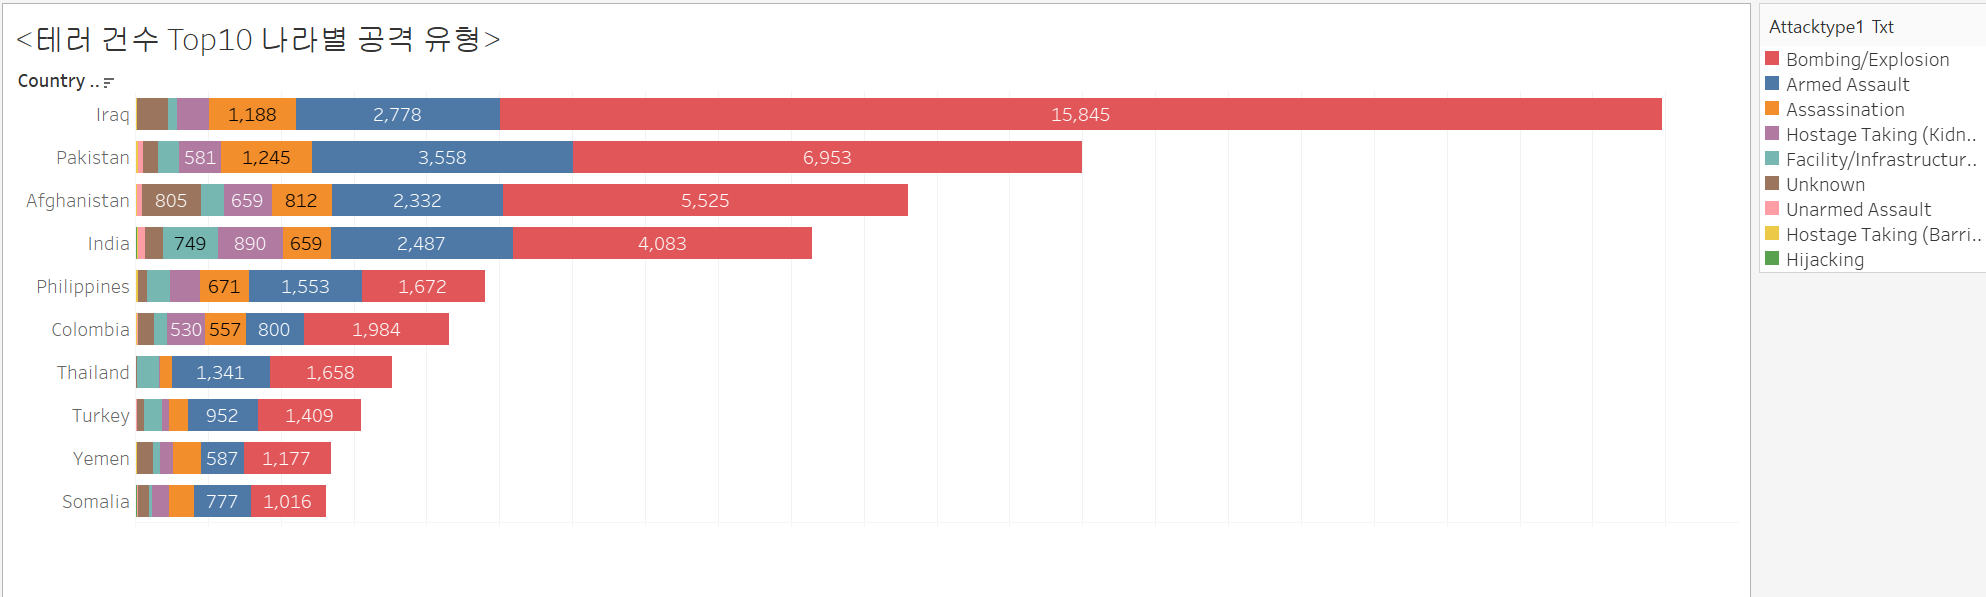

### **도출!**
- 테러가 많이 일어난 상위10개국의 공격 유형 분포를 파악한 결과, 폭발 테러가 제일 많음.
- 2위 역시 10개국 동일하게 무장 습격
- 3위 부터는 각 나라별로 상이

### **연도별 중동&북아프리카 테러 발생 건수 추이**

In [20]:
# 중동 지역 데이터 필터링
middle_east_df = df_1990[df_1990['region_txt'] == 'Middle East & North Africa']

# 연도별 테러 발생 건수 집계
attacks_per_year = middle_east_df['iyear'].value_counts().sort_index()

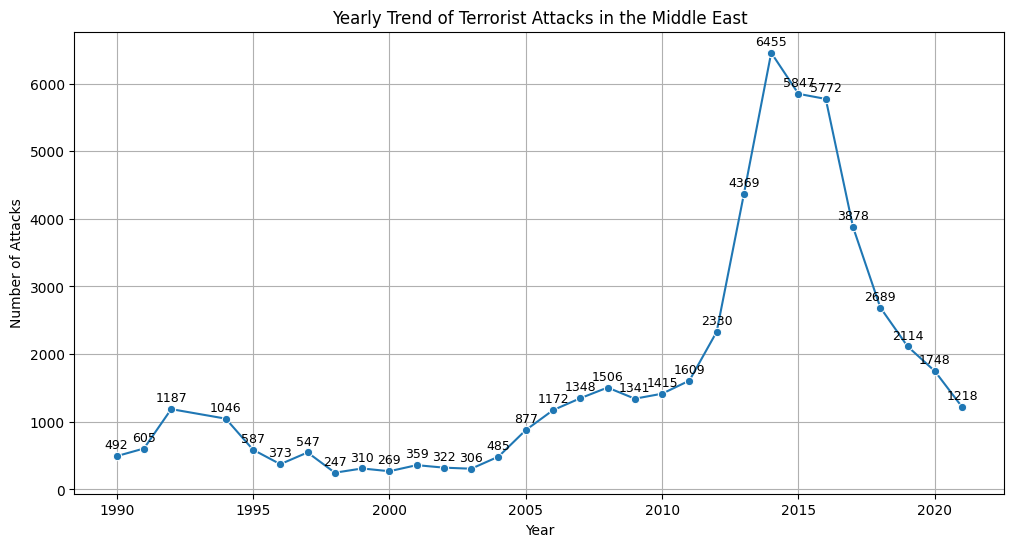

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')

# 수치 표시
for x, y in zip(attacks_per_year.index, attacks_per_year.values):
    plt.text(x, y + max(attacks_per_year.values)*0.01, str(y), ha='center', va='bottom', fontsize=9)

plt.title("Yearly Trend of Terrorist Attacks in the Middle East")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()

### **도출!**
- 2003~2005년 테러 발생이 급격하게 상승
- 2011~2013년 테러 발생이 급격하게 상승 <br>

→ 원인을 알아내기 위해 전세계적 흐름과 그 배경을 찾아보기!

### **연도별 Top10 나라 테러 발생 건수 추이**

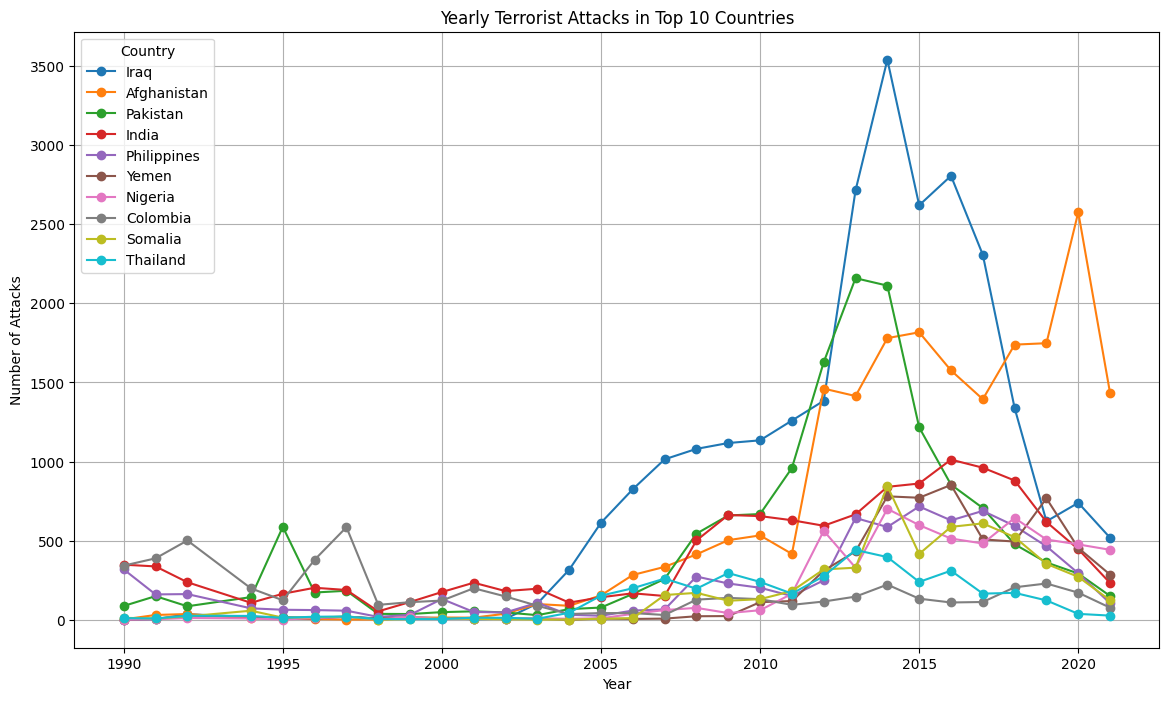

In [22]:
# Top 10 국가명 리스트 추출
top_10_country_names = top_countries.index.tolist()

# 연도와 국가 기준으로 건수 집계
country_year_counts = df_1990[df_1990['country_txt'].isin(top_10_country_names)] \
                        .groupby(['iyear', 'country_txt']) \
                        .size() \
                        .unstack(fill_value=0)  # 각 연도별 국가별 테러 건수

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

for country in top_10_country_names:
    plt.plot(country_year_counts.index, country_year_counts[country], marker='o', label=country)

plt.title("Yearly Terrorist Attacks in Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend(title="Country")
plt.grid(True)
plt.show()


In [23]:
import plotly.graph_objs as go
import plotly.express as px

# 라인 차트 그리기
fig = go.Figure()

for country in top_10_country_names:
    fig.add_trace(go.Scatter(
        x=country_year_counts.index,
        y=country_year_counts[country],
        mode='lines+markers',
        name=country
    ))

fig.update_layout(
    title="Yearly Terrorist Attacks in Top 10 Countries",
    xaxis_title="Year",
    yaxis_title="Number of Attacks",
    hovermode="x unified",
    legend_title="Country",
    width=1000,
    height=600
)

fig.show()

### **도출!**
1. 2003~2005 상승 (이라크)
- 2011 9.11 테러 발생 -> 2003년 이라크 전쟁 발발

<br>

2. 2004~2007 상승 (아프가니스탄)
- 2011 9.11 테러 발생 -> 2011년 미국의 반격으로 미국-아프가니스탄 전쟁 발발
- 그로 인해 테러 발생 횟수 상승

<br>

3. 2011~2014 상승 (이라크)
- 2011 이라크 전쟁 종전 이후(미국 철군), 이라크 종교적 갈등 심화
- 2013년 이후 시리아 내전 발발, ISIS가 생기고 이라크 서부 지역을 장악하면서 폭력 사태가 가속화

<br>

4. 2008~2012 상승 (파키스탄)
- 2011년 미국이 파키스탄에서 빈라덴을 사살 -> 파키스탄의 보복으로 테러 증가

<br>

5.  변화 추이
- 이라크 추이와 중동&북아프리카 추이를 봤을 때, 두 흐름이 비슷하게 흘러간다는 것을 알 수 있다.
- 이라크가 차지하는 비율이 많다고 판단 -> 파이 차트 생성





| 연도        | 지역            | 주요 사건 / 배경                                                    | 테러 급증 원인 요약                                  |
|-------------|------------------|----------------------------------------------------------------------|------------------------------------------------------|
| **2001**    | 미국 / 아프간    | 9.11 테러 발생, 미국의 아프가니스탄 침공                           | 탈레반 정권 붕괴 후 반군 활동 재개                   |
| **2003~2005** | 이라크           | 이라크 전쟁 발발, 후세인 정권 붕괴                                  | 치안 공백, 반군 및 극단주의 무장세력 성장           |
| **2004~2007** | 아프가니스탄     | 탈레반 세력 재건, 국경지대 중심 무장 활동 증가                     | 나토군 및 민간인 대상 자살폭탄 테러 확산            |
| **2008~2012** | 파키스탄         | TTP 및 알카에다 활동 강화, 오사마 빈 라덴 사살 (2011)              | 빈라덴 사살 보복, 종파 갈등                         |
| **2011~2014** | 이라크 / 시리아  | 미군 철수 이후 종파 갈등 격화, 시리아 내전 격화, ISIS 부상         | 보안 공백, ISIS 영토 확장, 대규모 테러 발생         |

### **중동&북아프리카 지역 내에서 테러 건수가 많은 국가**

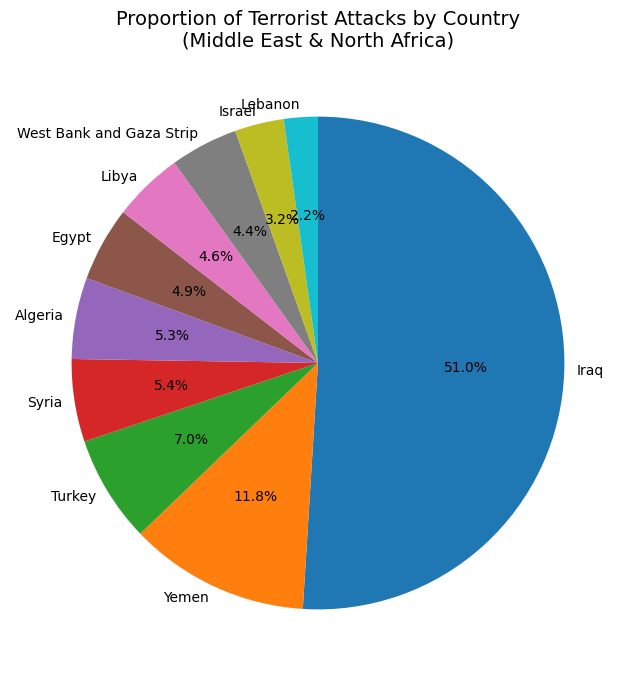

In [24]:
# 중동 지역에서 국가별 테러 건수
me_country_counts = middle_east_df['country_txt'].value_counts()

# 상위 10개국만 보기
top_me_countries = me_country_counts.head(10)

# 파이차트 생성
labels = top_me_countries.index.tolist()
sizes = top_me_countries.values.tolist()

colors = plt.cm.tab10.colors[:len(labels)]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    labeldistance=1.05,
    textprops={'fontsize': 10}
)
plt.title("Proportion of Terrorist Attacks by Country\n(Middle East & North Africa)", fontsize=14)
plt.show()

<ipython-input-25-f6c9af0930b4>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




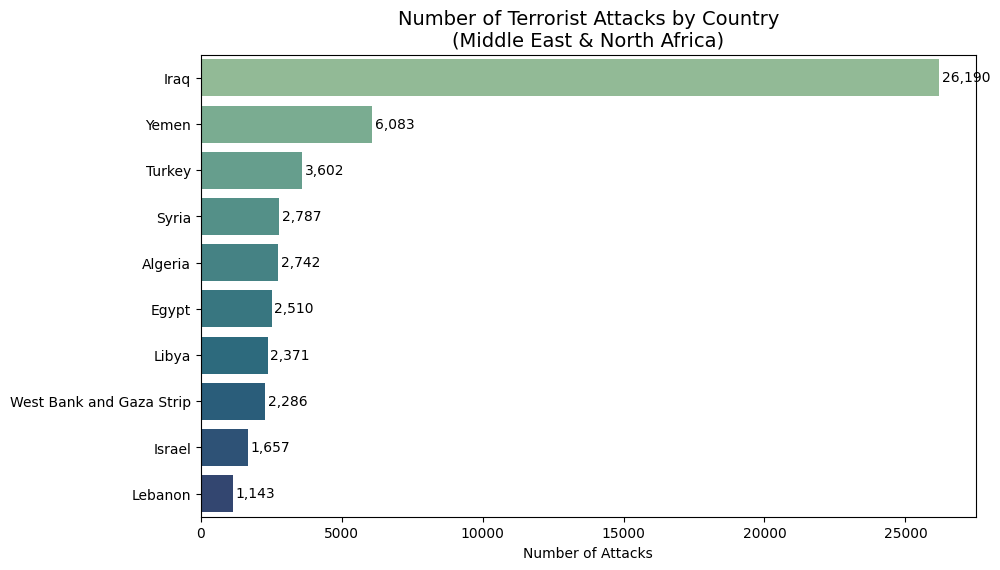

In [25]:
# 데이터 준비
labels = top_me_countries.index.tolist()
sizes = top_me_countries.values.tolist()

# seaborn 스타일 사용
plt.figure(figsize=(10, 6))

# 수평 막대그래프 (palette 적용)
ax = sns.barplot(x=sizes, y=labels, palette='crest')

# 텍스트 라벨 추가
for i, v in enumerate(sizes):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

# 스타일
plt.xlabel("Number of Attacks")
plt.title("Number of Terrorist Attacks by Country\n(Middle East & North Africa)", fontsize=14)
plt.show()


In [26]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.6 MB/s eta 0:00:00


In [28]:
weapon_type_mapping = {
    "Explosives": "폭발물",
    "Firearms": "화기",
    "Unknown": "알 수 없음",
    "Incendiary": "방화물",
    "Melee": "근접 무기",
    "Chemical": "화학 물질",
    "Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "차량 (차량 폭탄 제외)",
    "Sabotage Equipment": "파괴 장비",
    "Other": "기타",
    "Biological": "생물학 무기",
    "Fake Weapons": "가짜 무기",
    "Radiological": "방사능 무기"
}

df_1990["weaptype1_txt_kr"] = df_1990["weaptype1_txt"].map(weapon_type_mapping)


## **가설 2**
- **테러 피해자 수 (사망자+부상자) 는 사용된 무기 유형과 밀접한 관련이 있을 것이다.**

In [29]:
weapon_counts = df_1990['weaptype1_txt_kr'].value_counts()
weapon_counts

,count
weaptype1_txt_kr,
폭발물,83235
화기,53485
알 수 없음,16588
방화물,9518
근접 무기,4044
화학 물질,285
차량 (차량 폭탄 제외),182
파괴 장비,159
기타,126


### **무기 유형 설명**
- Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
  - Vehicle: 차량을 이용한 공격 (예: 돌진, 충돌 등)
  - not to include vehicle-borne explosives: 차량에 폭탄을 실은 공격(예: 자동차 폭탄)은 포함하지 않음
  - i.e., car or truck bombs: 즉, 자동차나 트럭에 설치한 폭탄은 제외됨

In [30]:
# 이름을 간략히 변경
df_1990['weaptype1_txt_kr'] = df_1990['weaptype1_txt_kr'].replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle'
)

### **무기 유형별 사용 빈도**

<ipython-input-31-b867f7bd9b69>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




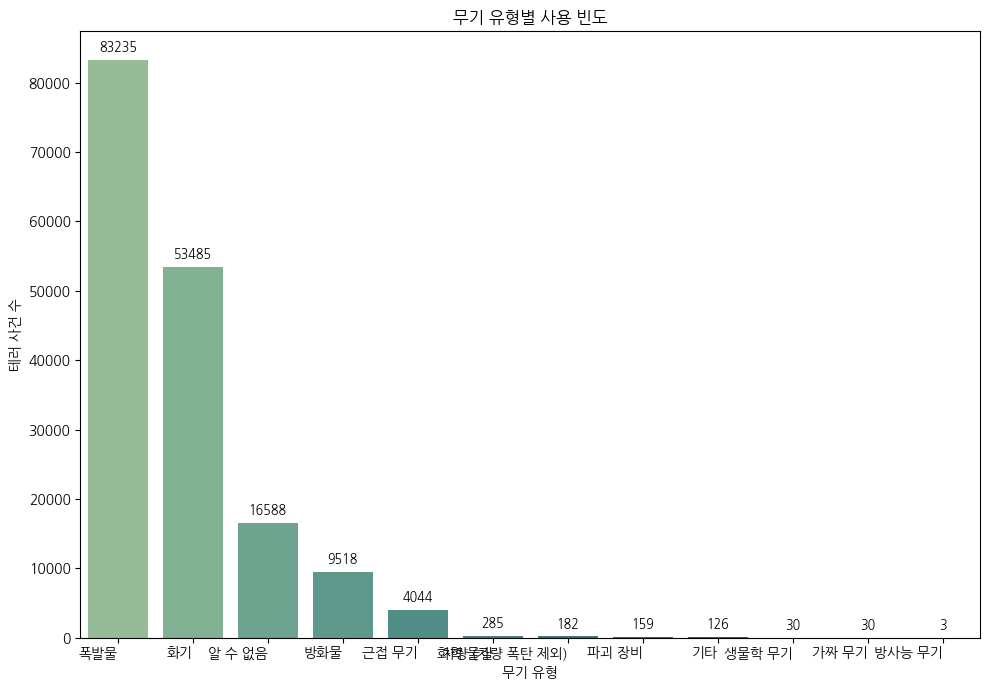

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 무기 유형별 사용 빈도
weapon_counts = df_1990['weaptype1_txt_kr'].value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Count']

# 그래프 그리기
plt.figure(figsize=(10, 7))
sns.barplot(data=weapon_counts, x='Weapon Type', y='Count', palette='crest')

plt.title('무기 유형별 사용 빈도')
plt.xlabel('무기 유형')
plt.ylabel('테러 사건 수')
plt.xticks(rotation=0, ha='right')

# 수치 표시
for index, row in weapon_counts.iterrows():
    plt.text(index, row['Count'] + weapon_counts['Count'].max() * 0.01,
             f"{int(row['Count'])}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### **연도별 무기 유형 사용 추이**
- 무기 상위 5개만
- 폭발물, 총기류, 미상, 방화 무기, 근접 무기

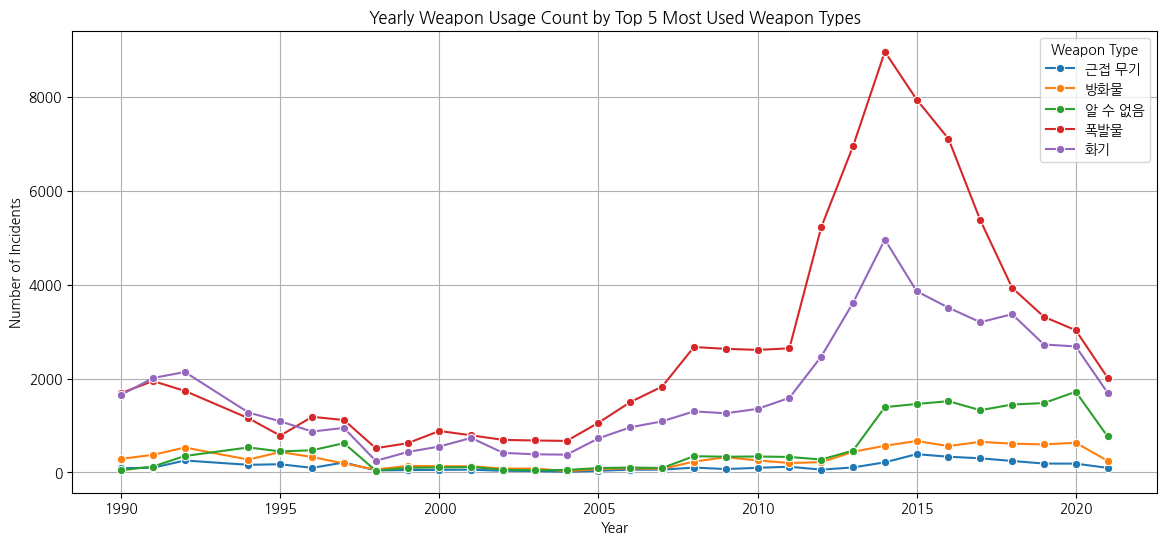

In [32]:
# 무기 사용 횟수 기준 상위 5개 무기 유형 추출
weapon_counts = df_1990['weaptype1_txt_kr'].value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Count']
top5_weapons = weapon_counts['Weapon Type'].iloc[:5].tolist()

# 연도별 무기 사용 횟수 집계
weapon_usage_year = df_1990[df_1990['weaptype1_txt_kr'].isin(top5_weapons)]
weapon_usage_year = weapon_usage_year.groupby(['iyear', 'weaptype1_txt_kr']).size().reset_index(name='count')

# 선그래프 그리기
plt.figure(figsize=(14, 6))
sns.lineplot(data=weapon_usage_year, x='iyear', y='count', hue='weaptype1_txt_kr', marker='o')

plt.title('Yearly Weapon Usage Count by Top 5 Most Used Weapon Types')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Weapon Type')
plt.grid(True)
plt.show()


### **도출!**
- 폭발물 : 2011년 이후로 사용량 급증 -> 2014년을 정점으로 하락
- 총기류 : 역시 2011년 이후로 사용량이 증가 -> 하락지점 역시 폭발물과 동일
- 방화 무기, 근접 무기, 미상 : 소폭 상승

### **무기 유형별 피해량 (nkill+nwound)**

In [33]:
# 무기 유형별 피해량 총합
weapon_total = df_1990.groupby('weaptype1_txt_kr')[['nkill', 'nwound']].sum()
weapon_total['total_victim'] = weapon_total['nkill'] + weapon_total['nwound']
weapon_total = weapon_total.sort_values(by='total_victim', ascending=False)
weapon_total = weapon_total.round(0).astype(int)
weapon_total

,nkill,nwound,total_victim
weaptype1_txt_kr,,,
폭발물,185099,391696,576795
화기,156253,87033,243286
알 수 없음,62866,34163,97029
근접 무기,11986,6664,18650
화학 물질,649,14038,14687
차량 (차량 폭탄 제외),1805,11686,13491
방화물,6385,6381,12766
파괴 장비,56,248,304
기타,155,131,286


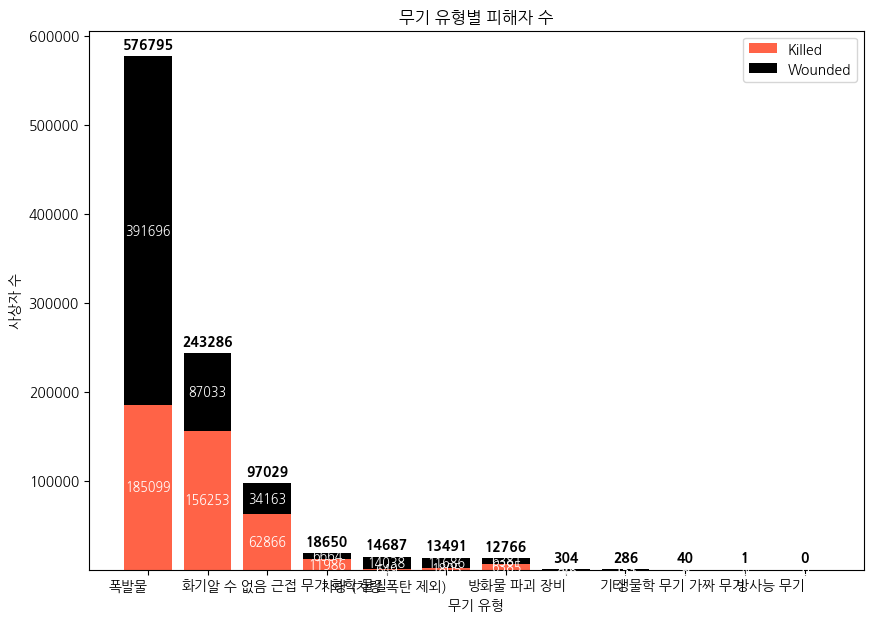

In [34]:
# 누적 막대 그래프
plt.figure(figsize=(10, 7))
bars_kill = plt.bar(weapon_total.index, weapon_total['nkill'], label='Killed', color='Tomato')
bars_wound = plt.bar(weapon_total.index, weapon_total['nwound'], bottom=weapon_total['nkill'], label='Wounded', color='black')

# 수치 표시
for i, (k, w) in enumerate(zip(weapon_total['nkill'], weapon_total['nwound'])):
    plt.text(i, k / 2, f'{int(k)}', ha='center', va='center', fontsize=9, color='white')
    plt.text(i, k + w / 2, f'{int(w)}', ha='center', va='center', fontsize=9, color='white')
    plt.text(i, k + w + weapon_total['total_victim'].max() * 0.01, f'{int(k + w)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('무기 유형별 피해자 수')
plt.xlabel('무기 유형')
plt.ylabel('사상자 수')
plt.xticks(rotation=0, ha='right')
plt.legend()
plt.show()

### **사망자 수가 많은 무기 유형**

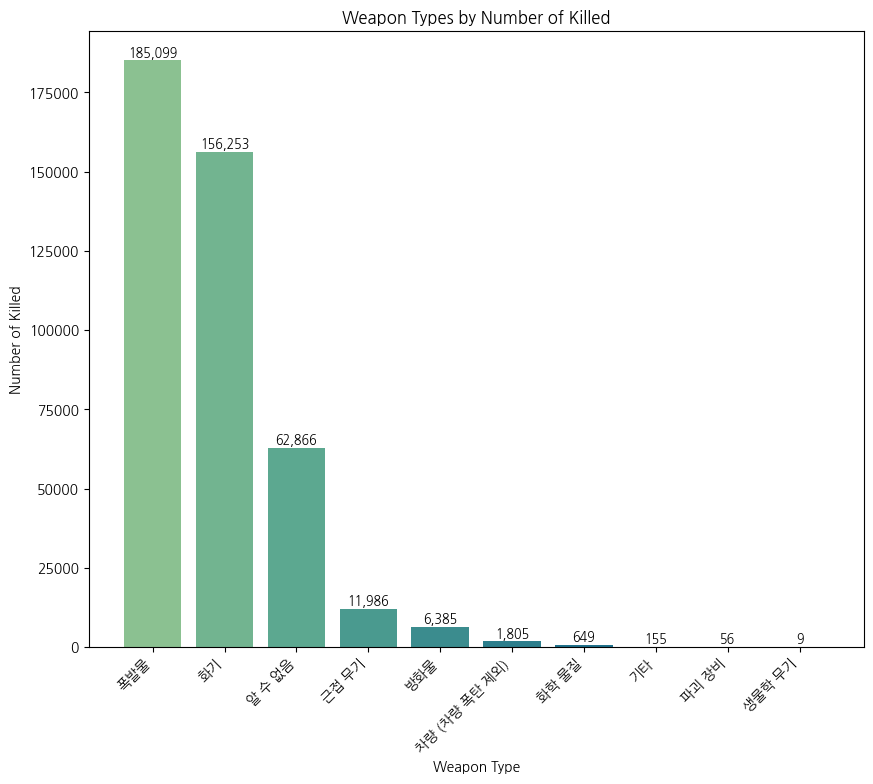

In [35]:
# 사망자 수 내림차순으로 무기 유형을 추출
top10_nkill = weapon_total.sort_values(by='nkill', ascending=False).head(10)

colors = sns.color_palette('crest', n_colors=10)

plt.figure(figsize=(10, 8))
bars = plt.bar(top10_nkill.index, top10_nkill['nkill'], color=colors)

plt.title('Weapon Types by Number of Killed')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Killed')
plt.xticks(rotation=45, ha='right')

# 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{height:,}',
             ha='center', va='bottom', fontsize=9)

plt.show()

### **부상자 수가 많은 무기 유형**

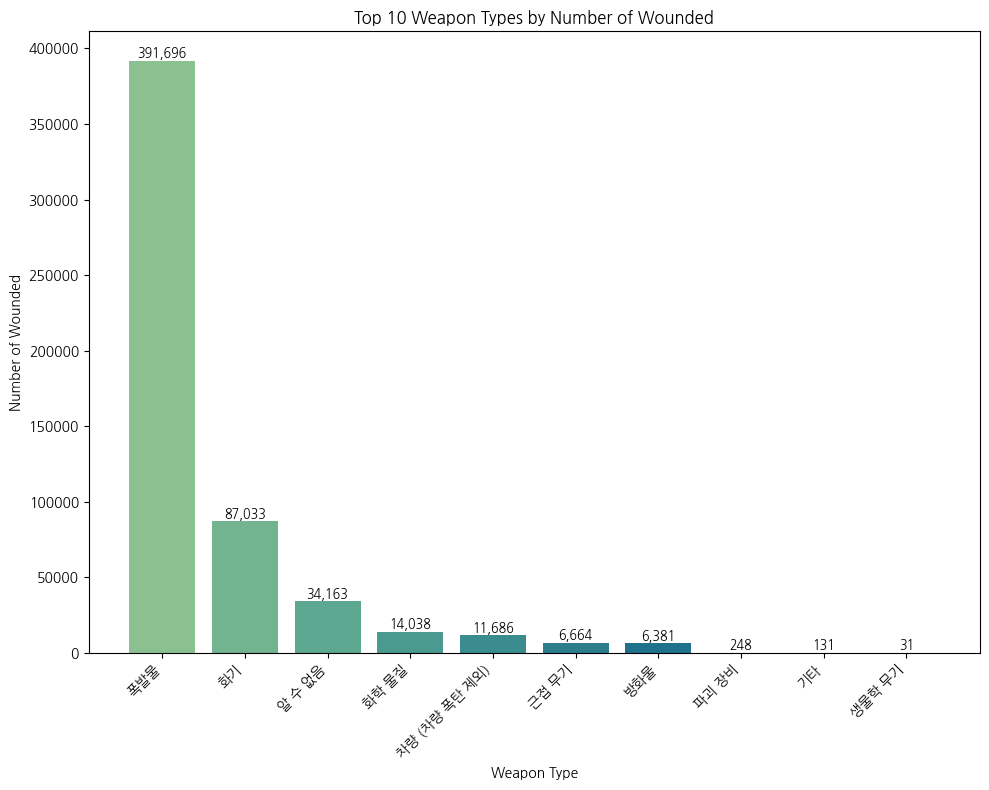

In [36]:
top10_wound = weapon_total.sort_values(by='nwound', ascending=False).head(10)

colors = sns.color_palette('crest', n_colors=10)

plt.figure(figsize=(10, 8))
bars = plt.bar(top10_wound.index, top10_wound['nwound'], color=colors)

plt.title('Top 10 Weapon Types by Number of Wounded')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Wounded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{height:,}',
             ha='center', va='bottom', fontsize=9)

plt.show()

### 도출!
- 폭발물, 총기류 : 사건이 많이 발생 -> 사상자도 많이 발생
- Vehicle : 9.11 테러로 인해서 사건 수에 비해 사상자가 높음


<Figure size 1200x1000 with 0 Axes>

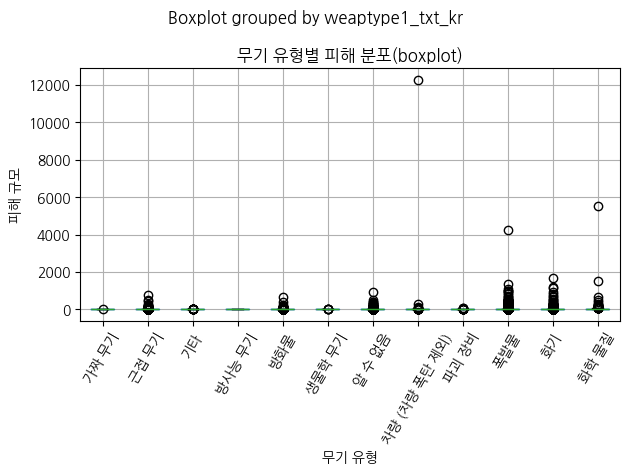

In [55]:
# 무기 유형별 피해 분포 (Boxplot)

plt.figure(figsize=(12, 10))
df_1990.boxplot(column='total_victim', by='weaptype1_txt_kr', rot=60)
plt.title('무기 유형별 피해 분포(boxplot)')
plt.xlabel('무기 유형')
plt.ylabel('피해 규모')
plt.tight_layout()
plt.show()

### **도출!**
- Vehicle 이상치
  - 2011 9.11 테러로 인한 많은 사상자
  - 이로 인해 Vehicle의 평균도 상승

- 폭발류로 인한 피해량이 가장 크다.
  - 발생 건수가 많기때문에 그런건지, 폭발물 자체가 피해량이 큰건지?

### **무기 유형별 1건당 피해량**

- victim_per_attack : 전체 피해량 / 테러 건수
- victim_per_attack 값이 높다 → 1건만 발생해도 피해가 큰 무기
- 사용 횟수가 적더라도 파괴력은 클 수 있음 → 전략적 위험 무기

In [38]:
# 무기별 총합 피해량
weapon_sum = df_1990.groupby('weaptype1_txt_kr')[['nkill', 'nwound']].sum()
weapon_sum['total_victim'] = weapon_sum['nkill'] + weapon_sum['nwound']

# 무기별 사용 횟수
weapon_count = df_1990['weaptype1_txt_kr'].value_counts()

# 효율 = 1건당 피해자 수
weapon_efficiency = weapon_sum.copy()
weapon_efficiency['usage_count'] = weapon_count
weapon_efficiency['victim_per_attack'] = weapon_efficiency['total_victim'] / weapon_efficiency['usage_count']

# 정렬
weapon_efficiency = weapon_efficiency.sort_values(by='victim_per_attack', ascending=False)
weapon_efficiency

,nkill,nwound,total_victim,usage_count,victim_per_attack
weaptype1_txt_kr,,,,,
차량 (차량 폭탄 제외),1805.0,11686,13491.0,182,74.126374
화학 물질,649.0,14038,14687.0,285,51.533333
폭발물,185099.0,391696,576795.0,83235,6.929717
알 수 없음,62866.0,34163,97029.0,16588,5.849349
근접 무기,11986.5,6664,18650.5,4044,4.611894
화기,156253.0,87033,243286.0,53485,4.548677
기타,155.0,131,286.0,126,2.269841
파괴 장비,56.0,248,304.0,159,1.911950
방화물,6385.0,6381,12766.0,9518,1.341248


<ipython-input-59-bace0fa78e4e>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




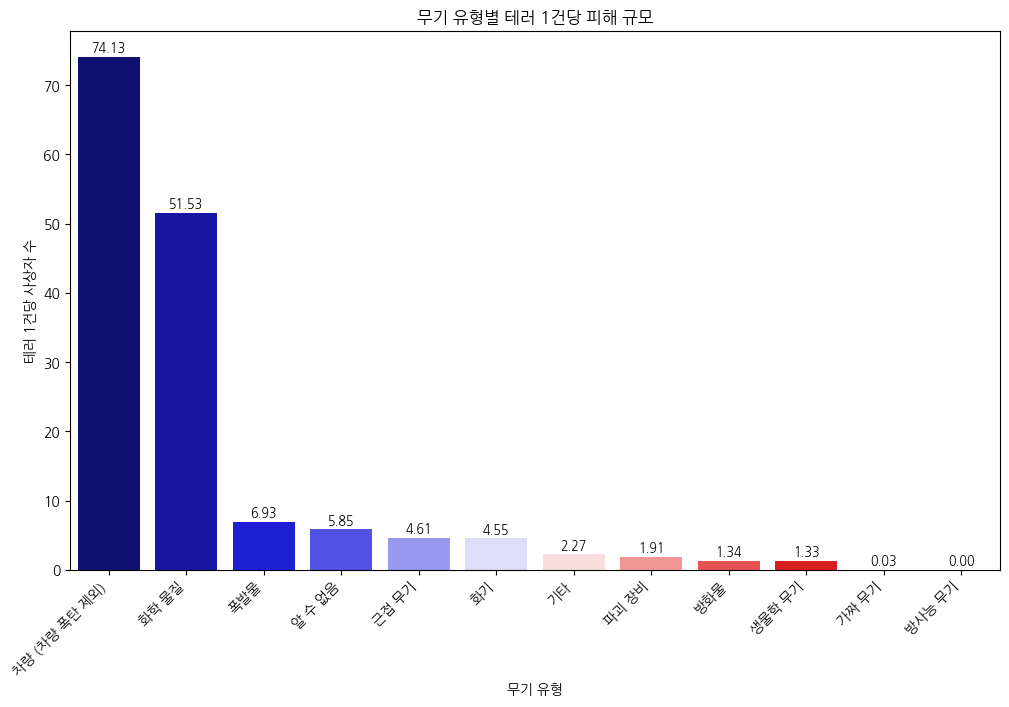

In [59]:
# 인덱스를 칼럼으로 변환
weapon_efficiency_reset = weapon_efficiency.reset_index()

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=weapon_efficiency_reset, x='weaptype1_txt_kr', y='victim_per_attack', palette='seismic')

# 수치 표시
for index, row in weapon_efficiency_reset.iterrows():
    plt.text(index, row['victim_per_attack'] + 0.3,
             f"{row['victim_per_attack']:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.title('무기 유형별 테러 1건당 피해 규모')
plt.xlabel('무기 유형')
plt.ylabel('테러 1건당 사상자 수')
plt.xticks(rotation=45, ha='right')
plt.show()

### **도출!**
- 차량 무기의 피해가 압도적
  - 평균 피해자 수가 176.17명으로 다른 무기에 비해 월등히 높음
  - 테러 횟수는 적더라도 한 번 발생 시 대량 피해가 발생하는 고위험 무기

## **추가적인 EDA**

### **상관 행렬**
- 수치형 : 피어슨 상관계
  - nkill, nwound, total_victim
- 범주형 : success, country_txt, region_txt, attacktype1_txt, targtype1_txt, weaptype1_txt_kr, gname

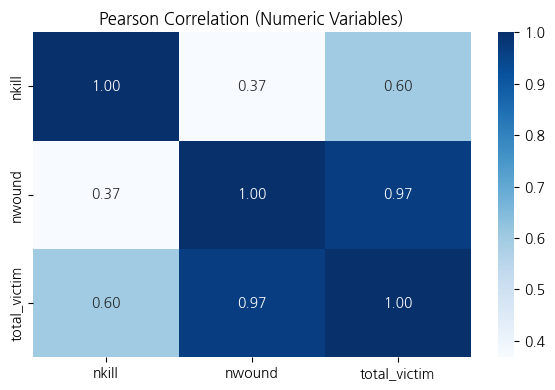

In [40]:
# 수치형 변수 상관관계
numeric_cols = ['nkill', 'nwound', 'total_victim']
df_numeric = df_1990[numeric_cols].dropna()

numeric_corr = df_numeric.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Pearson Correlation (Numeric Variables)")
plt.tight_layout()
plt.show()

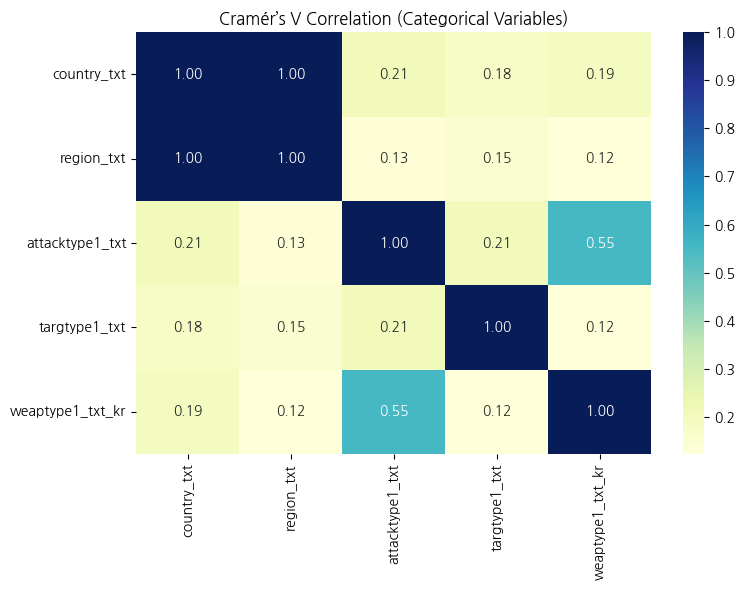

In [43]:
# 🔹 범주형 변수 간 Cramér's V 상관관계
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# 변수 설정
cat_cols = ['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt_kr']
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Cramér’s V 계산
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            cramer_matrix.loc[col1, col2] = cramers_v(df_1990[col1], df_1990[col2])

cramer_matrix = cramer_matrix.astype(float)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cramér’s V Correlation (Categorical Variables)")
plt.tight_layout()
plt.show()


### **도출!**
1. 수치형
- 수치형 상관관계는 추가로 파생변수가 생긴다면 그 때, 유의미한 결과가 발생할거라고 생각

<br>

2. 범주형
- 공격유형과 무기유형은 0.5를 넘기는 상관관계를 보인다.


### **연도별 전체 테러 발생 건수**

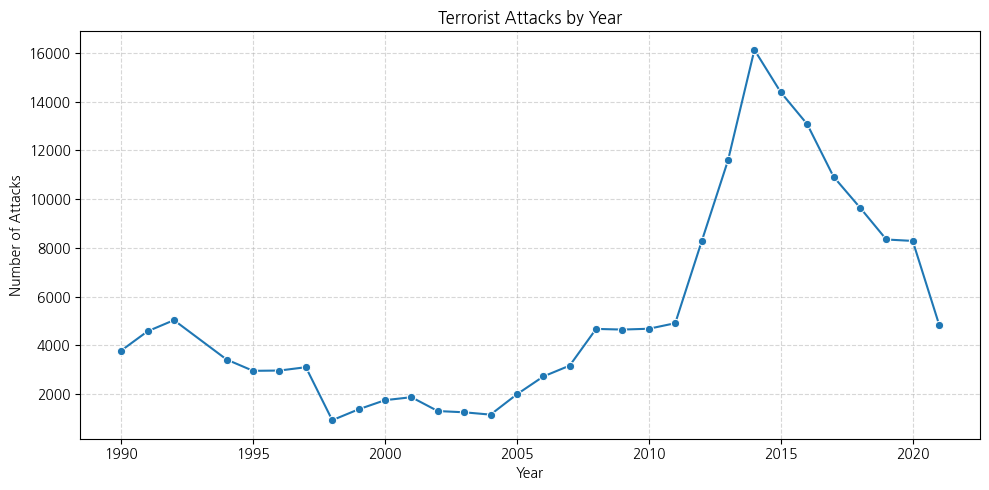

In [44]:
# 연도별 전체 테러 발생 건수
yearly_attacks = df_1990.groupby('iyear').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_attacks.index, y=yearly_attacks.values, marker='o')
plt.title('Terrorist Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **도출!**
- 폭발물 무기를 이용한 테러 추이와 거의 일치
- 테러 발생에서 폭발물 무기가 차지하는 비율이 높음

## **동아시아 분석**

### **연도별 동아시아 테러 발생 건수 추이**

In [45]:
# 중동 지역 데이터 필터링
east_asia_df = df_1990[df_1990['region_txt'] == 'East Asia']

# 연도별 테러 발생 건수 집계
attacks_per_year = east_asia_df['iyear'].value_counts().sort_index()

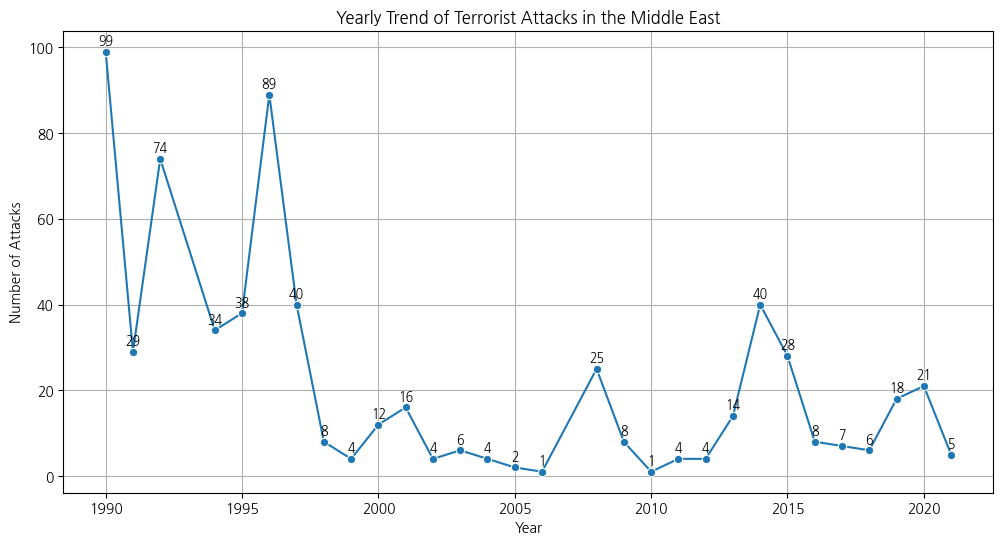

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')

# 수치 표시
for x, y in zip(attacks_per_year.index, attacks_per_year.values):
    plt.text(x, y + max(attacks_per_year.values)*0.01, str(y), ha='center', va='bottom', fontsize=9)

plt.title("Yearly Trend of Terrorist Attacks in the Middle East")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()

### **도출!**
- 1990~1996년 테러 발생 추이가 변동이 심하다.
- 2014년 테러 발생이 상승 <br>

→ 원인을 알아내기 위해 전세계적 흐름과 그 배경을 찾아보기!

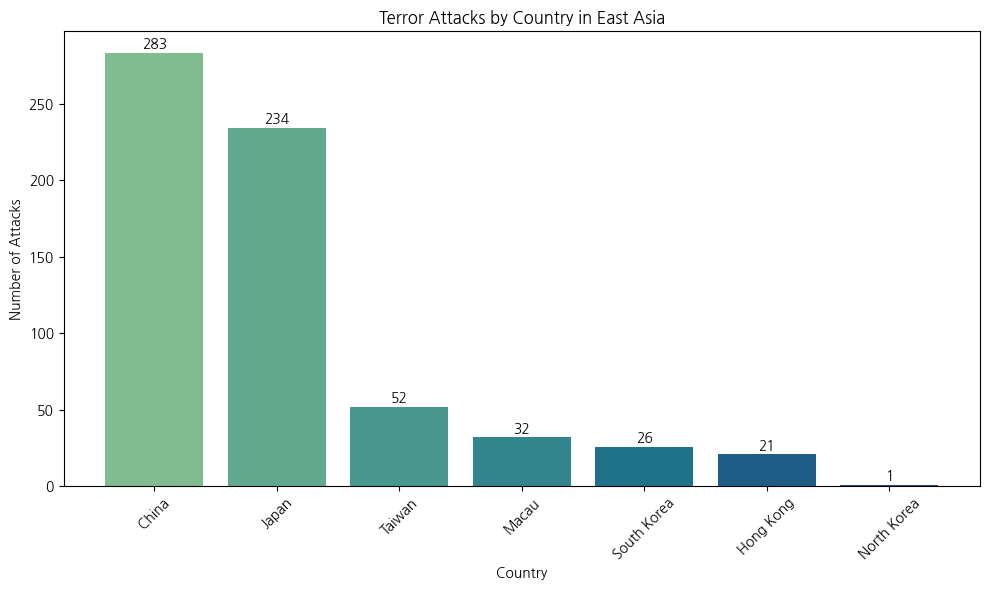

In [47]:
# 나라별 테러 발생 건수 집계
terrorism_by_country = east_asia_df['country_txt'].value_counts()

# 그래프 출력
colors = sns.color_palette('crest', n_colors=len(terrorism_by_country))
plt.figure(figsize=(10, 6))
bars = plt.bar(terrorism_by_country.index, terrorism_by_country.values, color=colors)

plt.title('Terror Attacks by Country in East Asia')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

# 수치 라벨 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 1, int(height),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [48]:
# Korea 필터링
korea_df = df_1990[df_1990['country_txt'].str.contains("Korea", case=False, na=False)]
korea_df

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,city,success,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,natlty1_txt,gname,total_victim,weaptype1_txt_kr
954,199004030004,1990,4,3,South Korea,East Asia,Seoul,37.566535,126.977969,Mard,1,Facility/Infrastructure Attack,Government (General),Incendiary,0.0,1,South Korea,Unknown,1.0,방화물
1384,199005110001,1990,5,11,South Korea,East Asia,Seoul,37.566535,126.977969,Hardumadam,1,Facility/Infrastructure Attack,Government (General),Incendiary,0.0,0,South Korea,Do-or-Die Corps for the Abolition of Anti-Publ...,0.0,방화물
1592,199005260006,1990,5,26,South Korea,East Asia,Seoul,37.566535,126.977969,Seoul,0,Unknown,Government (Diplomatic),Unknown,0.0,0,United States,Chondaehyop (Radical Student Coalition),0.0,알 수 없음
5004,199104080013,1991,4,8,South Korea,East Asia,Incheon,37.456256,126.705206,La Fortuna,1,Unknown,Military,Unknown,0.0,0,United States,Unknown,0.0,알 수 없음
5253,199105040008,1991,5,4,South Korea,East Asia,Seoul,37.566535,126.977969,Nagshereen,1,Unarmed Assault,Military,Melee,0.0,0,United States,Unknown,0.0,근접 무기
5904,199106280002,1991,6,28,South Korea,East Asia,Gwangju,35.159545,126.852601,Puhroo,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,2.0,2,United States,Unknown,4.0,방화물
6214,199107180008,1991,7,18,South Korea,East Asia,Gwangju,35.159545,126.852601,Ghazlan,1,Facility/Infrastructure Attack,Government (General),Incendiary,2.0,2,South Korea,Chonson Univ. students,4.0,방화물
7803,199111010006,1991,11,1,South Korea,East Asia,Seoul,37.566535,126.977969,Chattar,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,2.5,1,United States,Kyongbuk University Dental College Students,3.5,방화물
8001,199111140008,1991,11,14,South Korea,East Asia,Gwangju,35.159545,126.852601,Chanae district,1,Hostage Taking (Kidnapping),Police,Unknown,0.0,0,South Korea,Student Demonstrators,0.0,알 수 없음
10373,199205140018,1992,5,14,South Korea,East Asia,South Jeolla,34.990454,126.481686,AI-Jazeera al-Eith,1,Facility/Infrastructure Attack,Police,Incendiary,0.0,0,South Korea,Student Radicals,0.0,방화물
